In [1]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import numpy

from keras.wrappers.scikit_learn import KerasRegressor,KerasClassifier
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.model_selection import KFold,GridSearchCV

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



In [3]:
forest=pd.read_csv("/content/sample_data/forestfires.csv")
forest.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [4]:
forest.shape

(517, 31)

In [5]:
forest.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [6]:
forest1=forest.drop(['month','day'],axis=1)
forest2=forest.drop(['dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep'],axis=1)

In [7]:
forest_new=forest.drop(['dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep'],axis=1)

In [8]:
forest2.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small


In [9]:
forest2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  size_category  517 non-null    object 
dtypes: float64(8), int64(1), object(3)
memory usage: 48.6+ KB


In [10]:
print(forest2['month'].value_counts())
print(forest2['day'].value_counts())

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64
sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64


In [11]:
forest2['month']=LabelEncoder().fit_transform(forest2['month'])
forest2['day']=LabelEncoder().fit_transform(forest2['day'])


In [12]:
forest2.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small


In [13]:
forest2.describe().T

,count,mean,std,min,25%,50%,75%,max
month,517.0,5.758221,4.373275,0.0,1.0,6.00,11.00,11.00
day,517.0,2.736944,1.925061,0.0,1.0,3.00,4.00,6.00
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40


**************month*************


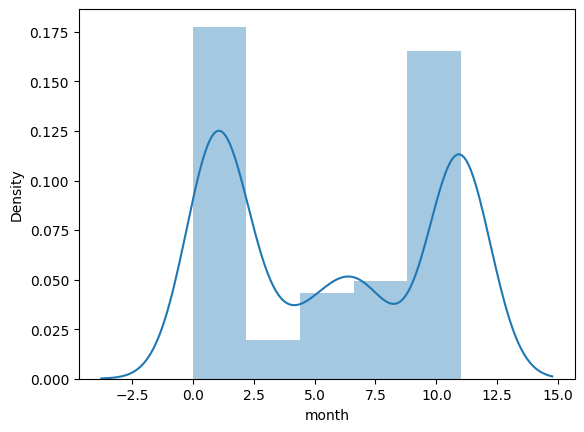

**************day*************


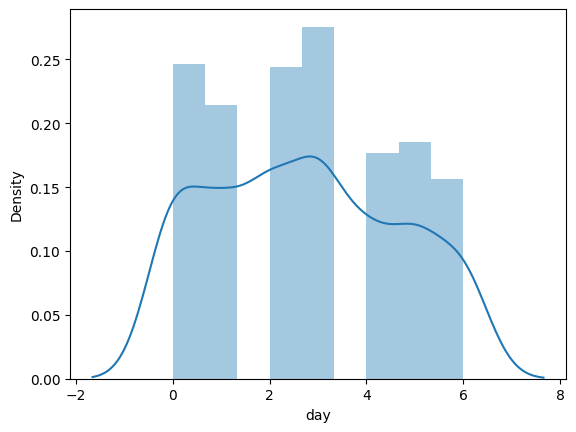

**************FFMC*************


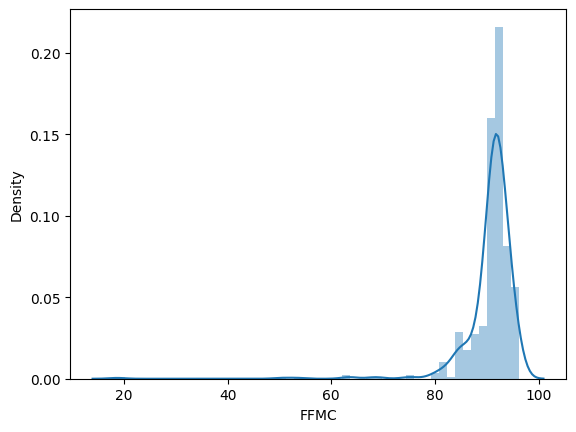

**************DMC*************


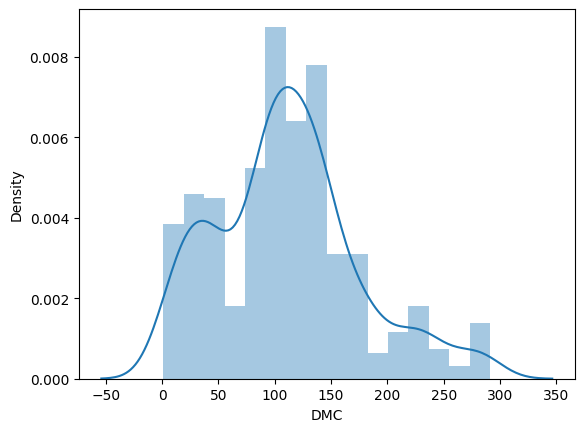

**************DC*************


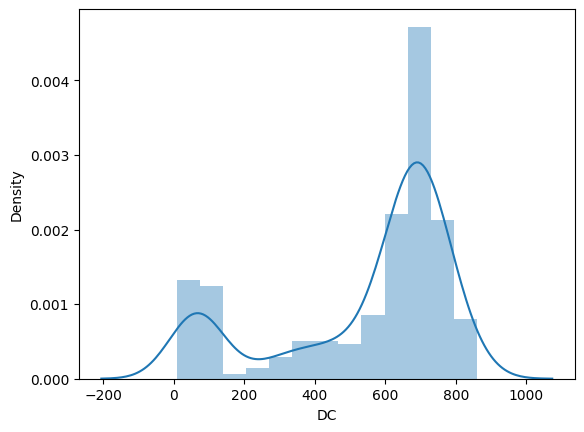

**************ISI*************


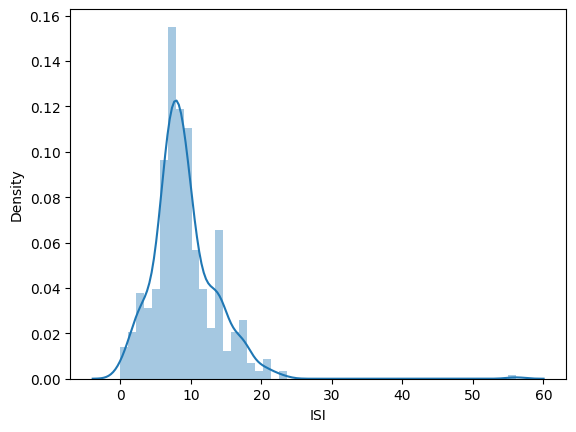

**************temp*************


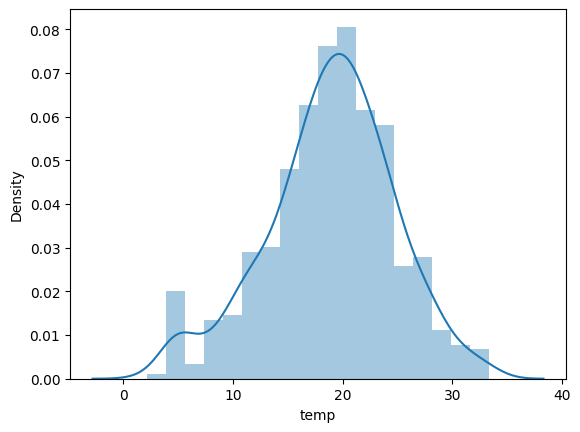

**************RH*************


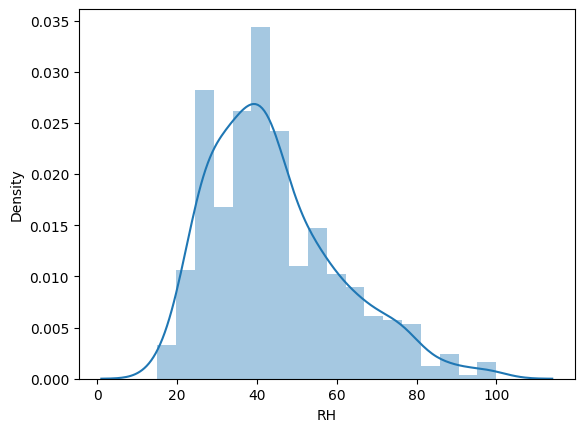

**************wind*************


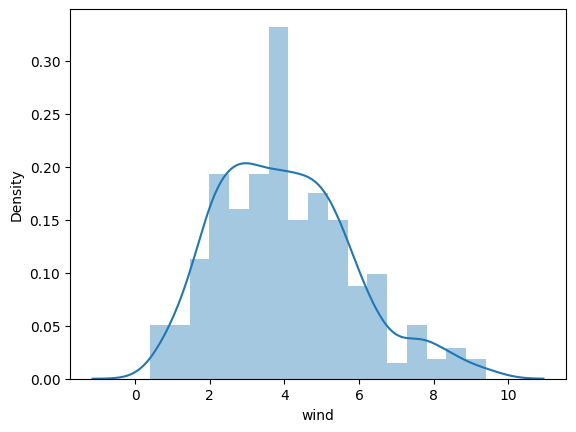

**************rain*************


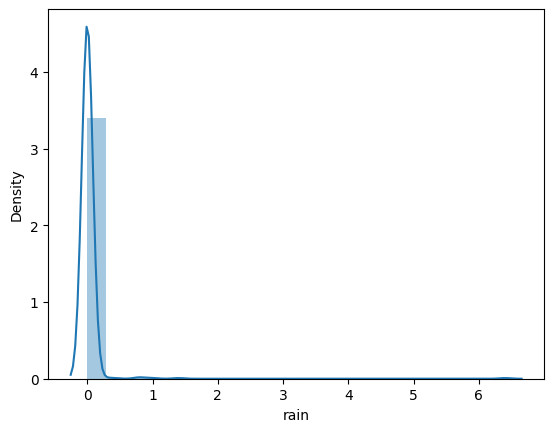

**************area*************


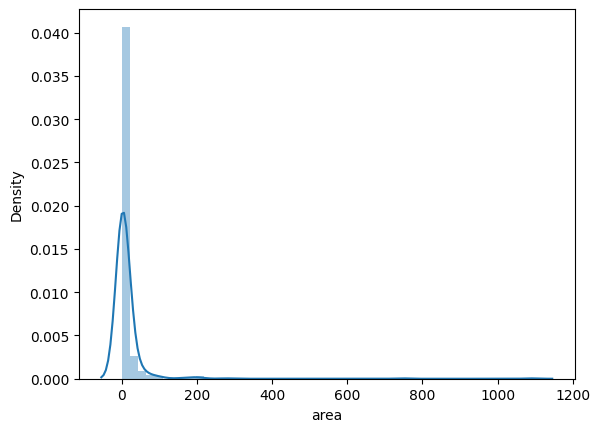

In [14]:
for data in forest2.columns:
  if forest2[data].dtype!='object':
    print("**************{}*************".format(data))
    sns.distplot(forest2[data])
    plt.show()

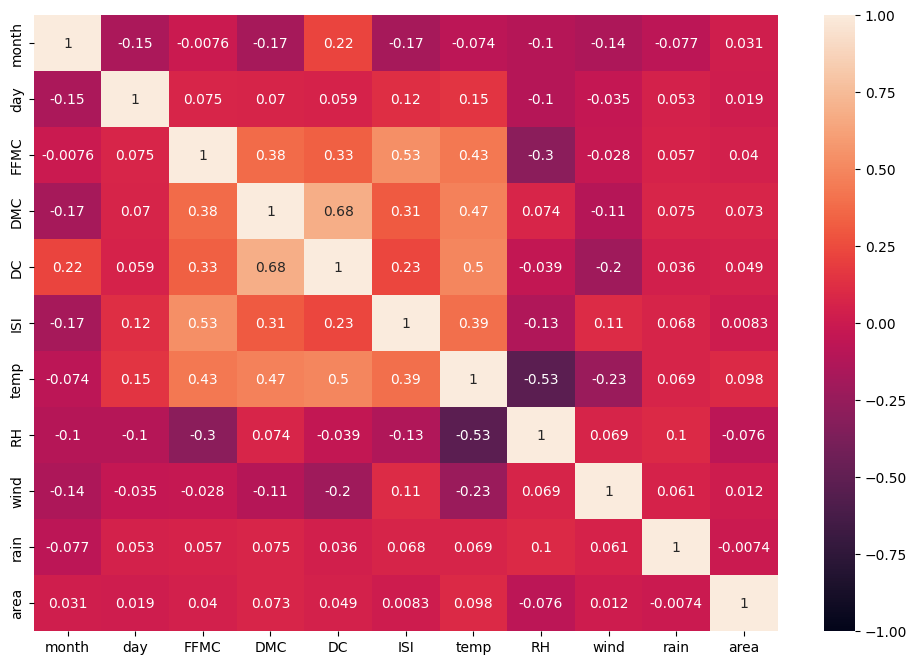

In [15]:
plt.figure(figsize=(12,8))
sns.heatmap(forest2.corr(),vmin=-1,vmax=1,annot=True)
plt.show()

In [16]:
forest2['area'].describe().T

count     517.000000
mean       12.847292
std        63.655818
min         0.000000
25%         0.000000
50%         0.520000
75%         6.570000
max      1090.840000
Name: area, dtype: float64

In [17]:
def area_cat(area):
  if area == 0.0:
      return "No damage"
  elif area <= 1:
      return "low"
  elif area <= 25:
      return "moderate"
  elif area <= 100:
      return "high"
  else:
      return "very high"

forest_new['damage_severity']=forest_new['area'].apply(area_cat)


In [18]:
forest_new.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category,damage_severity
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small,No damage
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small,No damage
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small,No damage
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small,No damage
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small,No damage


In [19]:
cat_col=['month','day']

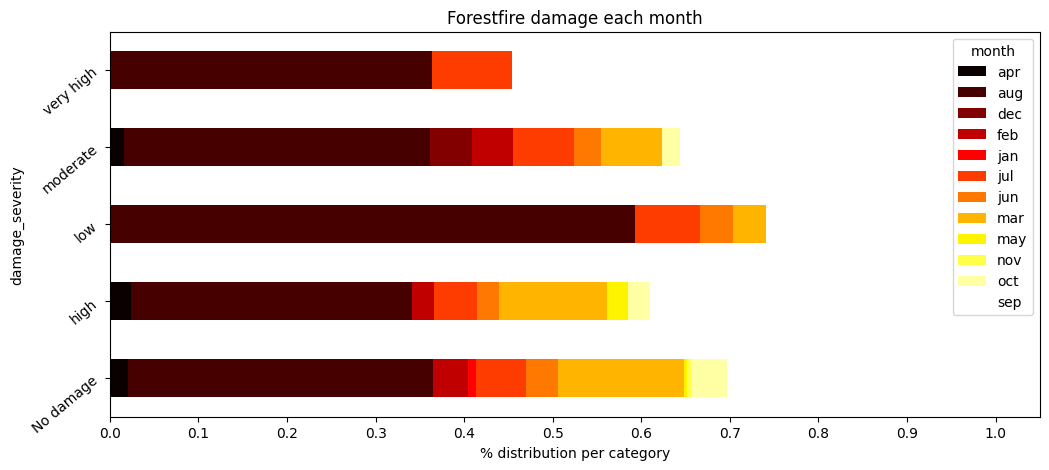

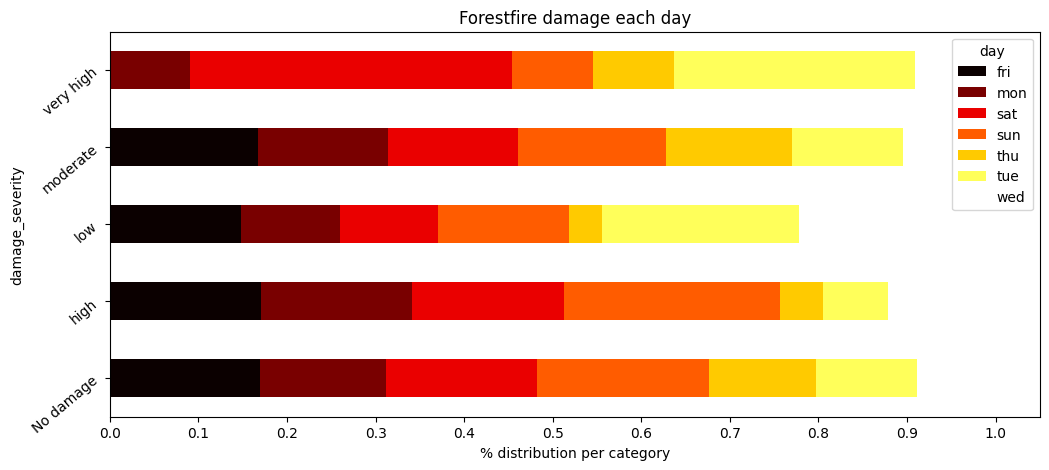

In [20]:
for cat in cat_col:
  cross=pd.crosstab(index=forest_new['damage_severity'],columns=forest_new[cat],normalize='index')
  cross.plot.barh(stacked=True,rot=40,cmap='hot',figsize=(12,5))
  plt.xlabel('% distribution per category')
  plt.xticks(np.arange(0,1.1,0.1))
  plt.title("Forestfire damage each {}".format(cat))
plt.show()



MODEL BUILDING

In [21]:
forest2.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small


In [22]:
forest2['size_category']=np.where((forest['size_category']=='small'),0,1)
#np.where(df['size_category'].str.contains("large"), 1, 0)
y=forest2[['size_category']]
x=forest2.drop('size_category',axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.33,random_state=42)
sc=MinMaxScaler()
x_train=sc.fit_transform(x_train)

In [23]:
x

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [24]:
x.shape

(517, 11)

In [25]:
y

,size_category
0,0
1,0
2,0
3,0
4,0
...,...
512,1
513,1
514,1
515,0


In [26]:
model=Sequential()
model.add(Dense(12,input_dim=11,kernel_initializer='normal',activation='softplus'))
model.add(Dense(8,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])

In [27]:
history=model.fit(x_train,y_train,validation_split=0.33,epochs=200,batch_size=20)

Epoch 1/200
12/12 [==============================] - 1s 23ms/step - loss: 0.2813 - accuracy: 0.2944 - val_loss: 0.2745 - val_accuracy: 0.2174
Epoch 2/200
12/12 [==============================] - 0s 5ms/step - loss: 0.2590 - accuracy: 0.3377 - val_loss: 0.2477 - val_accuracy: 0.6870
Epoch 3/200
12/12 [==============================] - 0s 7ms/step - loss: 0.2416 - accuracy: 0.7013 - val_loss: 0.2288 - val_accuracy: 0.7826
Epoch 4/200
12/12 [==============================] - 0s 5ms/step - loss: 0.2313 - accuracy: 0.7056 - val_loss: 0.2139 - val_accuracy: 0.7826
Epoch 5/200
12/12 [==============================] - 0s 6ms/step - loss: 0.2222 - accuracy: 0.7056 - val_loss: 0.2049 - val_accuracy: 0.7826
Epoch 6/200
12/12 [==============================] - 0s 5ms/step - loss: 0.2177 - accuracy: 0.7056 - val_loss: 0.1967 - val_accuracy: 0.7826
Epoch 7/200
12/12 [==============================] - 0s 5ms/step - loss: 0.2140 - accuracy: 0.7056 - val_loss: 0.1910 - val_accuracy: 0.7826
Epoch 8/200


In [28]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [29]:
score=model.evaluate(x_train,y_train)

11/11 [==============================] - 0s 2ms/step - loss: 0.1851 - accuracy: 0.7399


In [30]:
score=model.evaluate(x_test,y_test)

6/6 [==============================] - 0s 3ms/step - loss: 0.3172 - accuracy: 0.4386


In [31]:
y_pred=np.where(model.predict(x_test)>0.9,1,0)

6/6 [==============================] - 0s 2ms/step


In [32]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.73      1.00      0.84       125
           1       0.00      0.00      0.00        46

    accuracy                           0.73       171
   macro avg       0.37      0.50      0.42       171
weighted avg       0.53      0.73      0.62       171



In [33]:
confusion_matrix(y_test,y_pred)

array([[125,   0],
       [ 46,   0]])

In [34]:
score

[0.317159503698349, 0.4385964870452881]

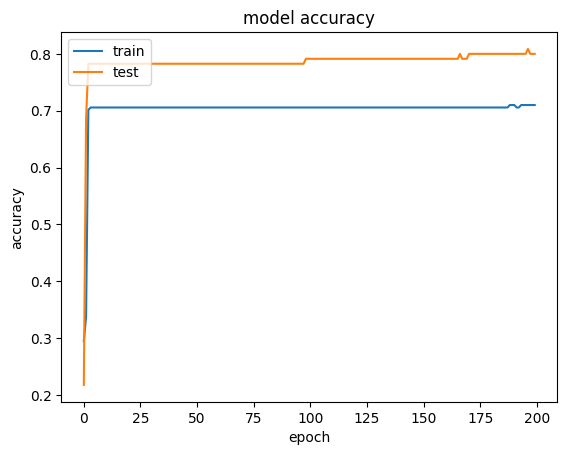

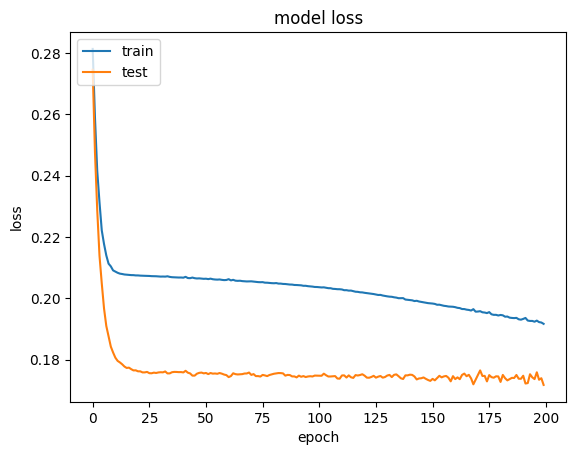

In [35]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

train=80 and test =90 which is not an good model lets tune the hyper parameter

HYPER parameter tuning

In [72]:
forest2.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,0
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0


In [36]:
y=forest2[['size_category']]
x=forest2.drop('size_category',axis=1)
x.shape


(517, 11)

In [79]:
#x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.33,random_state=42)
sc=StandardScaler()
xtran=sc.fit_transform(x)
ytran=sc.fit_transform(y)
xtran

(517, 1)

In [38]:
def create_model():
  model_new=Sequential()
  model_new.add(Dense(11,input_dim=11,kernel_initializer='normal',activation='relu'))
  model_new.add(Dense(8,kernel_initializer='normal',activation='relu'))
  model_new.add(Dense(units=1,kernel_initializer='normal',activation='sigmoid'))


  adam=Adam(learning_rate=0.001)
  model_new.compile(loss='mean_squared_error',optimizer=adam,metrics=['accuracy'])
  return model_new;

In [39]:
model_test=KerasClassifier(build_fn=create_model,verbose=0)
batch_size = [10,20,40]
epochs = [10,50,100,150]
param_grid=dict(batch_size=batch_size,epochs=epochs)
grid=GridSearchCV(estimator=model_test,param_grid=param_grid,cv=KFold(),verbose=10)
grid_result=grid.fit(xtran,ytran)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START batch_size=10, epochs=10...................................
[CV 1/5; 1/12] END ....batch_size=10, epochs=10;, score=1.000 total time=   1.4s
[CV 2/5; 1/12] START batch_size=10, epochs=10...................................
[CV 2/5; 1/12] END ....batch_size=10, epochs=10;, score=0.750 total time=   2.0s
[CV 3/5; 1/12] START batch_size=10, epochs=10...................................
[CV 3/5; 1/12] END ....batch_size=10, epochs=10;, score=0.660 total time=   2.1s
[CV 4/5; 1/12] START batch_size=10, epochs=10...................................
[CV 4/5; 1/12] END ....batch_size=10, epochs=10;, score=0.699 total time=   1.9s
[CV 5/5; 1/12] START batch_size=10, epochs=10...................................
[CV 5/5; 1/12] END ....batch_size=10, epochs=10;, score=0.748 total time=   1.3s
[CV 1/5; 2/12] START batch_size=10, epochs=50...................................
[CV 1/5; 2/12] END ....batch_size=10, epochs=50;

[CV 4/5; 9/12] END ....batch_size=40, epochs=10;, score=0.680 total time=   1.5s
[CV 5/5; 9/12] START batch_size=40, epochs=10...................................


[CV 5/5; 9/12] END ....batch_size=40, epochs=10;, score=0.699 total time=   1.3s
[CV 1/5; 10/12] START batch_size=40, epochs=50..................................
[CV 1/5; 10/12] END ...batch_size=40, epochs=50;, score=1.000 total time=   1.9s
[CV 2/5; 10/12] START batch_size=40, epochs=50..................................
[CV 2/5; 10/12] END ...batch_size=40, epochs=50;, score=0.798 total time=   1.9s
[CV 3/5; 10/12] START batch_size=40, epochs=50..................................
[CV 3/5; 10/12] END ...batch_size=40, epochs=50;, score=0.816 total time=   1.9s
[CV 4/5; 10/12] START batch_size=40, epochs=50..................................
[CV 4/5; 10/12] END ...batch_size=40, epochs=50;, score=0.806 total time=   2.0s
[CV 5/5; 10/12] START batch_size=40, epochs=50..................................
[CV 5/5; 10/12] END ...batch_size=40, epochs=50;, score=0.835 total time=   1.9s
[CV 1/5; 11/12] START batch_size=40, epochs=100.................................
[CV 1/5; 11/12] END ..batch_

In [40]:
print("best: {}, using : {}".format(grid_result.best_score_,grid_result.best_params_))
means=grid_result.cv_results_["mean_test_score"]
std=grid_result.cv_results_["std_test_score"]
params=grid_result.cv_results_["params"]
for mean,std,params in zip(means,std,params):
  print(" {}, {}, params: {} ".format(mean,std,params))

best: 0.9766990303993225, using : {'batch_size': 10, 'epochs': 150}
 0.7713592290878296, 0.1190696642497767, params: {'batch_size': 10, 'epochs': 10} 
 0.9650485515594482, 0.0328379245060673, params: {'batch_size': 10, 'epochs': 50} 
 0.9747759461402893, 0.02719517406905011, params: {'batch_size': 10, 'epochs': 100} 
 0.9766990303993225, 0.025017665292594235, params: {'batch_size': 10, 'epochs': 150} 
 0.7364077568054199, 0.15359763543603858, params: {'batch_size': 20, 'epochs': 10} 
 0.9302464485168457, 0.03802099797425691, params: {'batch_size': 20, 'epochs': 50} 
 0.963125467300415, 0.03215745097077955, params: {'batch_size': 20, 'epochs': 100} 
 0.9709484815597534, 0.02038330823460736, params: {'batch_size': 20, 'epochs': 150} 
 0.7325242757797241, 0.15178268966445949, params: {'batch_size': 40, 'epochs': 10} 
 0.8508775234222412, 0.07557503450975514, params: {'batch_size': 40, 'epochs': 50} 
 0.9496452450752259, 0.02696210604633905, params: {'batch_size': 40, 'epochs': 100} 
 0.96

 0.9766990303993225, 0.025017665292594235, params: {'batch_size': 10, 'epochs': 150}

**Hyper para meter : learning rate and dropout rate**

In [41]:
from keras.layers import Dropout
def create_model(learning_rate,dropout_rate):
  model=Sequential()
  model.add(Dense(8,input_dim=11,kernel_initializer='normal',activation='relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(3,kernel_initializer='normal',activation='relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(1,kernel_initializer='normal',activation='sigmoid'))


  adam=Adam(lr=learning_rate)
  model.compile(loss='mean_squared_error',optimizer=adam,metrics=['accuracy'])
  return model;


model_new=KerasClassifier(build_fn=create_model,verbose=0,batch_size=20,epochs=200)


learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]
param_grid=dict(learning_rate = learning_rate,dropout_rate = dropout_rate)
grid=GridSearchCV(estimator=model_new,param_grid=param_grid,cv=KFold(),verbose=10)
grid_result=grid.fit(xtran,ytran)



Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 1/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=1.000 total time=  11.0s
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 2/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.981 total time=   6.9s
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 3/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.981 total time=  10.9s
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 4/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.971 total time=  11.0s
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 5/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.951 total time=  10.9s
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................
[CV 1/5; 

In [42]:
print("best: {}, using : {}".format(grid_result.best_score_,grid_result.best_params_))
means=grid_result.cv_results_["mean_test_score"]
std=grid_result.cv_results_["std_test_score"]
params=grid_result.cv_results_["params"]
for mean,std,params in zip(means,std,params):
  print(" {}, {}, params: {} ".format(mean,std,params))

best: 0.9864077687263488, using : {'dropout_rate': 0.1, 'learning_rate': 0.001}
 0.9767363667488098, 0.01578420021280345, params: {'dropout_rate': 0.0, 'learning_rate': 0.001} 
 0.8816094040870667, 0.17961592145973332, params: {'dropout_rate': 0.0, 'learning_rate': 0.01} 
 0.9631628036499024, 0.024114763654862103, params: {'dropout_rate': 0.0, 'learning_rate': 0.1} 
 0.9864077687263488, 0.016927758771990948, params: {'dropout_rate': 0.1, 'learning_rate': 0.001} 
 0.9709111213684082, 0.03009357059957467, params: {'dropout_rate': 0.1, 'learning_rate': 0.01} 
 0.9150485396385193, 0.08577272766902676, params: {'dropout_rate': 0.1, 'learning_rate': 0.1} 
 0.9825242757797241, 0.02162238219576884, params: {'dropout_rate': 0.2, 'learning_rate': 0.001} 
 0.9747572898864746, 0.020913256185903856, params: {'dropout_rate': 0.2, 'learning_rate': 0.01} 
 0.8914488434791565, 0.05874198072608048, params: {'dropout_rate': 0.2, 'learning_rate': 0.1} 


 0.9864077687263488, 0.016927758771990948, params: {'dropout_rate': 0.1, 'learning_rate': 0.001}

TUNING OF ACTIVATION FUNCTION and KERNEL INITIALISER

In [43]:
def create_model(activation_function,init):
  model=Sequential()
  model.add(Dense(8,input_dim=11,kernel_initializer=init,activation=activation_function))
  model.add(Dropout(0.1))
  model.add(Dense(3,kernel_initializer=init,activation=activation_function))
  model.add(Dropout(0.1))
  model.add(Dense(1,activation='sigmoid'))

  adam=Adam(learning_rate=0.001)
  model.compile(loss="mean_squared_error",optimizer=adam,metrics=['accuracy'])
  return model


model_new=KerasClassifier(build_fn=create_model,verbose=0,batch_size = 40,epochs = 50)

activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']

param_grid=dict(activation_function=activation_function,init=init)

grid=GridSearchCV(estimator=model_new,param_grid=param_grid,cv=KFold(),verbose=10)
grid_result=grid.fit(xtran,ytran)



Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 1/5; 1/12] END activation_function=softmax, init=uniform;, score=1.000 total time=   2.1s
[CV 2/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 2/5; 1/12] END activation_function=softmax, init=uniform;, score=0.750 total time=   2.3s
[CV 3/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 3/5; 1/12] END activation_function=softmax, init=uniform;, score=0.524 total time=   2.1s
[CV 4/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 4/5; 1/12] END activation_function=softmax, init=uniform;, score=0.680 total time=   2.1s
[CV 5/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 5/5; 1/12] END activation_function=softmax, init=uniform;, score=0.699 total time=   2.0s
[CV 1/5; 2/12] START activation_function=softmax, init=normal...

In [44]:
print("best: {}, using : {}".format(grid_result.best_score_,grid_result.best_params_))
means=grid_result.cv_results_["mean_test_score"]
std=grid_result.cv_results_["std_test_score"]
params=grid_result.cv_results_["params"]
for mean,std,params in zip(means,std,params):
  print(" {}, {}, params: {} ".format(mean,std,params))

best: 0.8451082944869995, using : {'activation_function': 'tanh', 'init': 'uniform'}
 0.7305825233459473, 0.15435061319000673, params: {'activation_function': 'softmax', 'init': 'uniform'} 
 0.7305825233459473, 0.15435061319000673, params: {'activation_function': 'softmax', 'init': 'normal'} 
 0.7305825233459473, 0.15435061319000673, params: {'activation_function': 'softmax', 'init': 'zero'} 
 0.8218446612358093, 0.0940746141721868, params: {'activation_function': 'relu', 'init': 'uniform'} 
 0.7519230723381043, 0.15286466464029744, params: {'activation_function': 'relu', 'init': 'normal'} 
 0.7305825233459473, 0.15435061319000673, params: {'activation_function': 'relu', 'init': 'zero'} 
 0.8451082944869995, 0.08033653777016266, params: {'activation_function': 'tanh', 'init': 'uniform'} 
 0.8354182124137879, 0.08421457141494994, params: {'activation_function': 'tanh', 'init': 'normal'} 
 0.7305825233459473, 0.15435061319000673, params: {'activation_function': 'tanh', 'init': 'zero'} 
 

 0.8451082944869995, 0.08033653777016266, params: {'activation_function': 'tanh', 'init': 'uniform'}

TUNING OF NURON

In [45]:
def create_model(nuron1,nuron2):
  model=Sequential()
  model.add(Dense(nuron1,input_dim=11,kernel_initializer='uniform',activation='tanh'))
  model.add(Dropout(0.1))
  model.add(Dense(nuron2,kernel_initializer='uniform',activation='tanh'))
  model.add(Dropout(0.1))
  model.add(Dense(1,activation='sigmoid'))

  adam=Adam(learning_rate=0.001)
  model.compile(loss="mean_squared_error",optimizer=adam,metrics=['accuracy'])
  return model


model_new=KerasClassifier(build_fn=create_model,verbose=0,batch_size = 10,epochs = 100)

nuron1 = [4,8,16]
nuron2 = [2,4,8]

param_grid=dict(nuron1=nuron1,nuron2=nuron2)

grid=GridSearchCV(estimator=model_new,param_grid=param_grid,cv=KFold(),verbose=10)
grid_result=grid.fit(xtran,ytran)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START nuron1=4, nuron2=2..........................................
[CV 1/5; 1/9] END ...........nuron1=4, nuron2=2;, score=1.000 total time=   6.9s
[CV 2/5; 1/9] START nuron1=4, nuron2=2..........................................
[CV 2/5; 1/9] END ...........nuron1=4, nuron2=2;, score=1.000 total time=   7.5s
[CV 3/5; 1/9] START nuron1=4, nuron2=2..........................................
[CV 3/5; 1/9] END ...........nuron1=4, nuron2=2;, score=1.000 total time=  11.0s
[CV 4/5; 1/9] START nuron1=4, nuron2=2..........................................
[CV 4/5; 1/9] END ...........nuron1=4, nuron2=2;, score=0.961 total time=   6.7s
[CV 5/5; 1/9] START nuron1=4, nuron2=2..........................................
[CV 5/5; 1/9] END ...........nuron1=4, nuron2=2;, score=0.971 total time=  11.0s
[CV 1/5; 2/9] START nuron1=4, nuron2=4..........................................
[CV 1/5; 2/9] END ...........nuron1=4, nuron2=4;,

In [46]:
print("best: {}, using : {}".format(grid_result.best_score_,grid_result.best_params_))
means=grid_result.cv_results_["mean_test_score"]
std=grid_result.cv_results_["std_test_score"]
params=grid_result.cv_results_["params"]
for mean,std,params in zip(means,std,params):
  print(" {}, {}, params: {} ".format(mean,std,params))

best: 0.9864077687263488, using : {'nuron1': 4, 'nuron2': 2}
 0.9864077687263488, 0.016927758771990948, params: {'nuron1': 4, 'nuron2': 2} 
 0.9825242757797241, 0.02162238219576884, params: {'nuron1': 4, 'nuron2': 4} 
 0.978659451007843, 0.0233103416742172, params: {'nuron1': 4, 'nuron2': 8} 
 0.9825242757797241, 0.02162238219576884, params: {'nuron1': 8, 'nuron2': 2} 
 0.9805825233459473, 0.024561384825713878, params: {'nuron1': 8, 'nuron2': 4} 
 0.9864077687263488, 0.016927758771990948, params: {'nuron1': 8, 'nuron2': 8} 
 0.9806198596954345, 0.021270919744903034, params: {'nuron1': 16, 'nuron2': 2} 
 0.9864077687263488, 0.016927758771990948, params: {'nuron1': 16, 'nuron2': 4} 
 0.9805825233459473, 0.023781454947417, params: {'nuron1': 16, 'nuron2': 8} 


0.9805825233459473, 0.024561384825713878, params: {'nuron1': 8, 'nuron2': 4}

0.9864077687263488, 0.016927758771990948, params: {'nuron1': 4, 'nuron2': 2}

In [65]:
def create_model():
  model=Sequential()
  model.add(Dense(16,input_dim=11,kernel_initializer='uniform',activation='tanh'))
  model.add(Dropout(0.1))
  model.add(Dense(4,kernel_initializer='uniform',activation='tanh'))
  model.add(Dropout(0.1))
  model.add(Dense(1,activation='sigmoid'))

  adam=Adam(learning_rate=0.001)
  model.compile(loss="mean_squared_error",optimizer=adam,metrics=['accuracy'])
  return model


model_new=KerasClassifier(build_fn=create_model,verbose=0,batch_size = 10,epochs = 150)

model_new.fit(xtran,y)
y_pred=model_new.predict(xtran)

17/17 [==============================] - 0s 1ms/step


In [81]:
y_pred=model_new.predict(xtran)

17/17 [==============================] - 0s 2ms/step


accuracy_score(np.round(ytran),np.round(y_pred))

In [82]:
accuracy_score(np.round(y),np.round(y_pred))

0.941972920696325

In [83]:
#train test validation
x_train,x_test,y_train,y_test=train_test_split(xtran,y,test_size=0.2)

In [84]:
model_new.fit(x_train,y_train)
y_pred=model_new.predict(x_train)
print("train score {}".format(accuracy_score(np.round(y_train),np.round(y_pred))))

13/13 [==============================] - 0s 2ms/step
train score 0.9927360774818402


In [85]:
model_new.fit(x_test,y_test)
y_pred_test=model_new.predict(x_test)
print("test score {}".format(accuracy_score(np.round(y_test),np.round(y_pred_test))))

4/4 [==============================] - 0s 4ms/step
test score 1.0


In [87]:
forest2.shape

(517, 12)

In [88]:
forest2['pred']=model_new.predict(xtran)

17/17 [==============================] - 0s 1ms/step


In [89]:
forest2.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category,pred
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0,0
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,0
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,0,0
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0


In [90]:
forest2['error']=forest2.size_category-forest2.pred
forest2.error

0      0
1      0
2      0
3      0
4      0
      ..
512    1
513    0
514    0
515    0
516    0
Name: error, Length: 517, dtype: int64

In [93]:
print(classification_report(forest2['size_category'],forest2['pred']))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       378
           1       0.99      0.87      0.93       139

    accuracy                           0.96       517
   macro avg       0.97      0.93      0.95       517
weighted avg       0.96      0.96      0.96       517



In [94]:
confusion_matrix(forest2['size_category'],forest2['pred'])

array([[377,   1],
       [ 18, 121]])

In [96]:
forest2.to_csv("forestFire_prediction.csv")